<a href="https://colab.research.google.com/github/MounikaRasaputra/litter-detection-and-classification/blob/main/HOG_and_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
from skimage import io, feature

In [ ]:
!unzip /content/train.zip

In [ ]:
print(len('/content/train/litt'))
print(len('/content/train/nonlit'))
print(len('/content/train/nonlit'))




In [ ]:
# Define the path to your image dataset
#data_path = '/content/drive/MyDrive/train/train'
data_path='/content/train'

# Define the parameters for HOG feature extraction
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
visualize = False
normalize = True

# Initialize empty lists to store the features and labels
hog_features = []
labels = []

# Loop through each subdirectory in the dataset
for class_folder in os.listdir(data_path):
    class_path = os.path.join(data_path, class_folder)
    if not os.path.isdir(class_path):
        continue

    # Loop through each image file in the subdirectory
    for file_name in os.listdir(class_path):
        image_path = os.path.join(class_path, file_name)
        if not os.path.isfile(image_path):
            continue

        # Load the image and convert it to grayscale
        image = io.imread(image_path, as_gray=True)
        image = cv2.resize(image,(128,128))

        # Extract the HOG features from the image
        hog_feature = feature.hog(image, orientations=orientations,
                                  pixels_per_cell=pixels_per_cell,
                                  cells_per_block=cells_per_block,
                                  visualize=visualize)#, normalize=normalize)


        # Append the features and label to the corresponding lists
        hog_features.append(hog_feature)
        #print(hog_features)
        labels.append(class_folder)

# Convert the lists to numpy arrays
hog_features = np.array(hog_features)
labels1 = np.array(labels)


In [ ]:
hog_features.shape

In [ ]:
import os
import numpy as np
from skimage import io, feature
import cv2

# Define the path to your image dataset
data_path = '/content/train'

# Define the parameters for HOG feature extraction
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
visualize = False

# Initialize empty list to store the features
hog_features = []

# Loop through each subdirectory in the dataset
for class_folder in os.listdir(data_path):
    class_path = os.path.join(data_path, class_folder)
    if not os.path.isdir(class_path):
        continue

    # Loop through each image file in the subdirectory
    for file_name in os.listdir(class_path):
        image_path = os.path.join(class_path, file_name)
        if not os.path.isfile(image_path):
            continue

        # Load the image and convert it to grayscale
        image = io.imread(image_path, as_gray=True)
        image = cv2.resize(image, (128, 128))

        # Extract the HOG features from the image
        hog_feature = feature.hog(image, orientations=orientations,
                                  pixels_per_cell=pixels_per_cell,
                                  cells_per_block=cells_per_block,
                                  visualize=visualize)

        # Append the features to the hog_features list
        hog_features.append(hog_feature)

# Convert the list to a numpy array
hog_features = np.array(hog_features)

# Print the shape of the feature array
print("Shape of hog_features array:", hog_features.shape)


Shape of hog_features array: (33, 15876)


In [ ]:
labels1

array(['nonlit', 'nonlit', 'nonlit', 'nonlit', 'nonlit', 'nonlit',
       'nonlit', 'nonlit', 'nonlit', 'nonlit', 'nonlit', 'nonlit',
       'nonlit', 'nonlit', 'nonlit', 'nonlit', 'nonlit', 'litt', 'litt',
       'litt', 'litt', 'litt', 'litt', 'litt', 'litt', 'litt', 'litt',
       'litt', 'litt', 'litt', 'litt', 'litt', 'litt'], dtype='<U6')

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(hog_features,labels)



In [ ]:
from  skimage.feature import hog

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/nlitt_6.jfif',0)
hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
hog_features=hog_features[:15876]
prediction = rf.predict([hog_features])
print(prediction)
if prediction=='litt':
  img = cv2.imread('nlitt_6.jfif')

# Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


  # Apply thresholding to create a binary image
  _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

  # Find contours in the binary image
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Loop through each contour
  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    bbox = img[y:y+h, x:x+w]

    # Convert the cropped image to grayscale
    bbox_gray = cv2.cvtColor(bbox, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, bbox_thresh = cv2.threshold(bbox_gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    bbox_contours, _ = cv2.findContours(bbox_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through each contour in the bounding box
    for bbox_contour in bbox_contours:
        # Get the bounding box around the contour
        bx, by, bw, bh = cv2.boundingRect(bbox_contour)

        # Draw a bounding box around the litter particle code on the original image
        cv2.rectangle(img, (x+bx, y+by), (x+bx+bw, y+by+bh), (0, 255, 0), 2)

# Display the result
  cv2_imshow( img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
else:
  print('no litt')

['nonlit']
no litt


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(hog_features, labels1)

SVC(kernel='linear')

In [ ]:
# Coefficients of the features
coefficients = clf.coef_
print(coefficients.size)

# Constant term in the decision function
intercept = clf.intercept_
print(intercept)


15876
[-0.81581976]


In [ ]:
# Get support vectors
support_vectors = clf.support_vectors_

# Compute distances
distances = clf.decision_function(support_vectors)

# Find minimum distance
min_distance = abs(min(distances, key=abs))
print(min_distance)

# Calculate margin
margin = 2 * min_distance
print(margin)


0.9993800682839421
1.9987601365678842


In [ ]:
acc=rf.score(hog_features, labels1)
print(acc*100)

['litt']


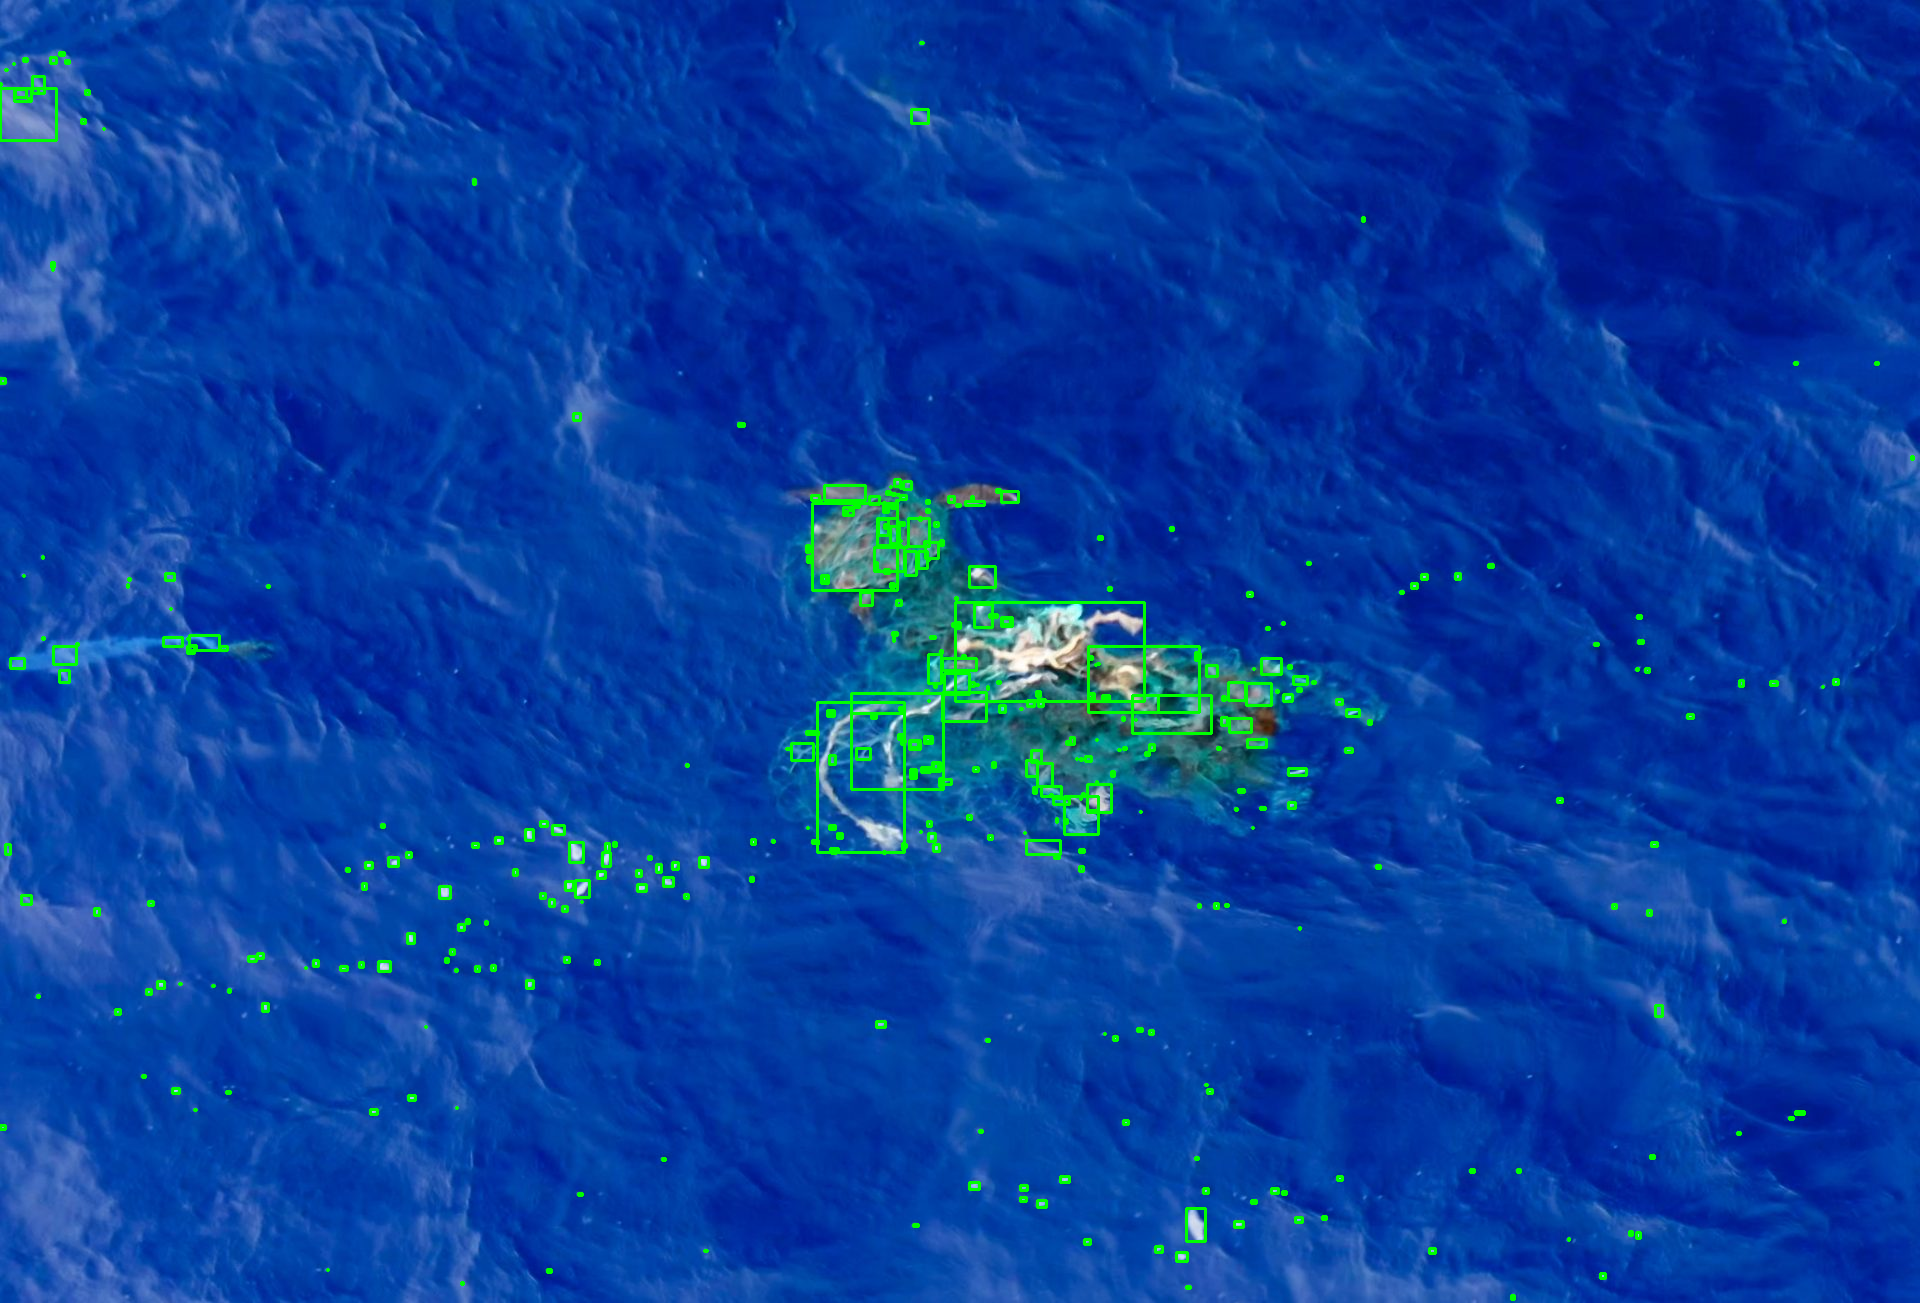

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/litt_2.jpg',0)
hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
hog_features=hog_features[:15876]
prediction = clf.predict([hog_features])
print(prediction)
if prediction=='litt':
  img = cv2.imread('litt_2.jpg')

# Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


  # Apply thresholding to create a binary image
  _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

  # Find contours in the binary image
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Loop through each contour
  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    bbox = img[y:y+h, x:x+w]

    # Convert the cropped image to grayscale
    bbox_gray = cv2.cvtColor(bbox, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, bbox_thresh = cv2.threshold(bbox_gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    bbox_contours, _ = cv2.findContours(bbox_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through each contour in the bounding box
    for bbox_contour in bbox_contours:
        # Get the bounding box around the contour
        bx, by, bw, bh = cv2.boundingRect(bbox_contour)

        # Draw a bounding box around the litter particle code on the original image
        cv2.rectangle(img, (x+bx, y+by), (x+bx+bw, y+by+bh), (0, 255, 0), 2)

# Display the result
  cv2_imshow( img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
else:
  print('no litt')